1 Analyze Crop Distribution
Crop Types: Study the distribution of the Item column to identify the most and least cultivated crops across regions.
Geographical Distribution: Explore the Area column to understand which regions focus on specific crops or have high agricultural activity.

Most Cultivated Crops

C:\Users\Gowtham\AppData\Local\Temp\ipykernel_8080\2895647957.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=crop_counts.index[:10], x=crop_counts.values[:10], palette="coolwarm")


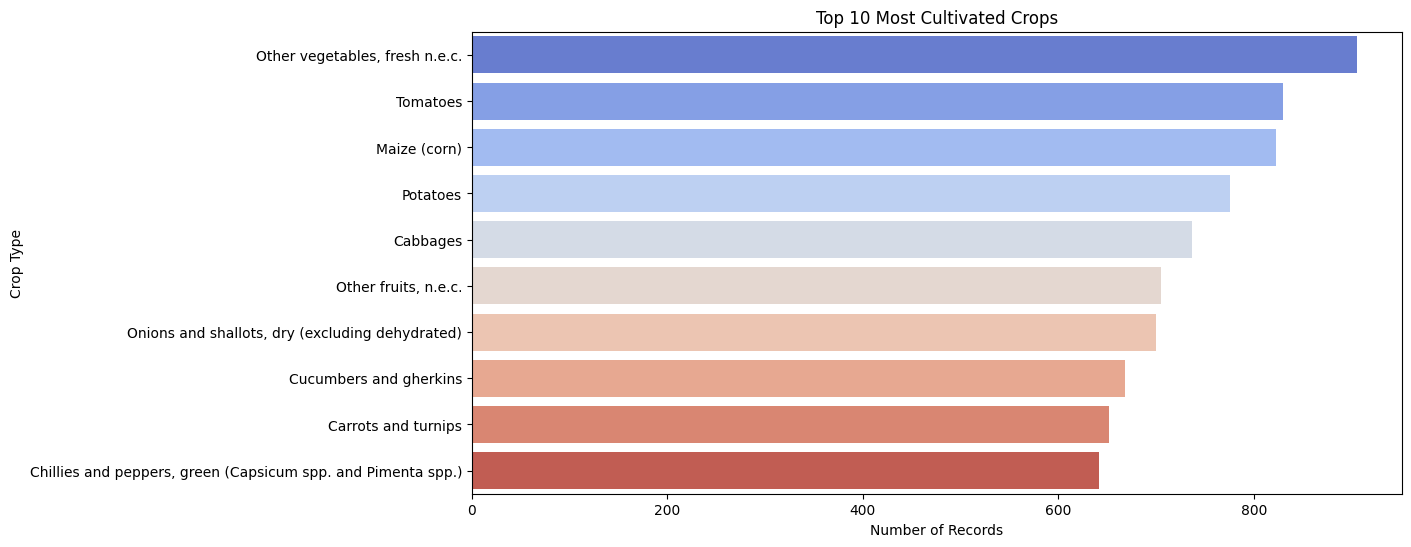

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:/Project_3/FAOSTAT_TRANSFORMED_CLEANED.csv")

crop_counts = df["Item"].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(y=crop_counts.index[:10], x=crop_counts.values[:10], palette="coolwarm")
plt.title("Top 10 Most Cultivated Crops")
plt.xlabel("Number of Records")
plt.ylabel("Crop Type")
plt.show()


Least Cultivated Crops

C:\Users\Gowtham\AppData\Local\Temp\ipykernel_8080\109550501.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=crop_counts.index[-10:], x=crop_counts.values[-10:], palette="coolwarm")


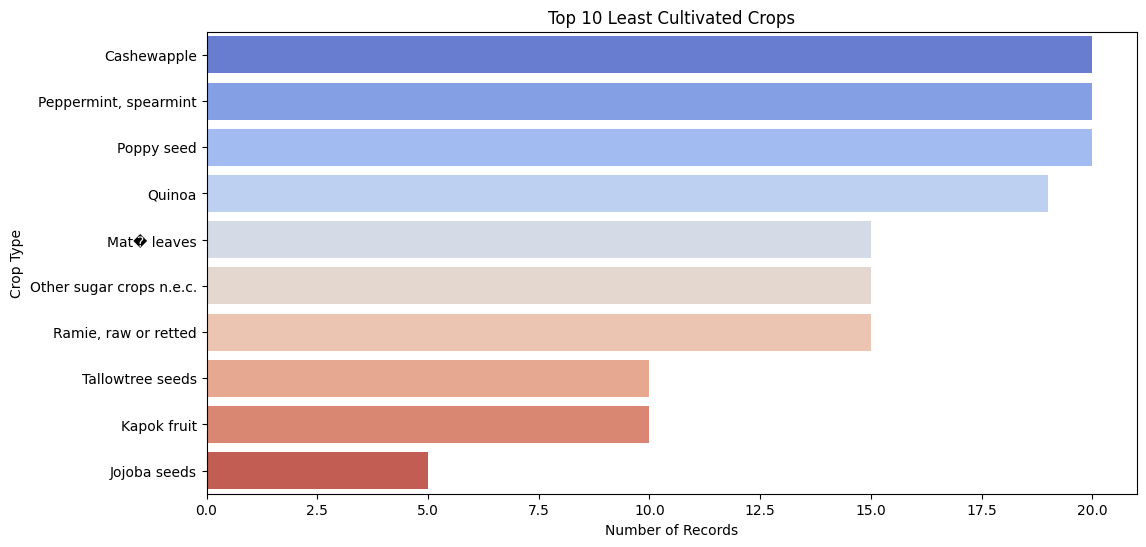

In [3]:
plt.figure(figsize=(12, 6))
sns.barplot(y=crop_counts.index[-10:], x=crop_counts.values[-10:], palette="coolwarm")
plt.title("Top 10 Least Cultivated Crops")
plt.xlabel("Number of Records")
plt.ylabel("Crop Type")
plt.show()

Crop Distribution Across Regions

C:\Users\Gowtham\AppData\Local\Temp\ipykernel_8080\3212343608.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=crop_region_counts.index[:10], x=crop_region_counts.values[:10], palette="Blues")


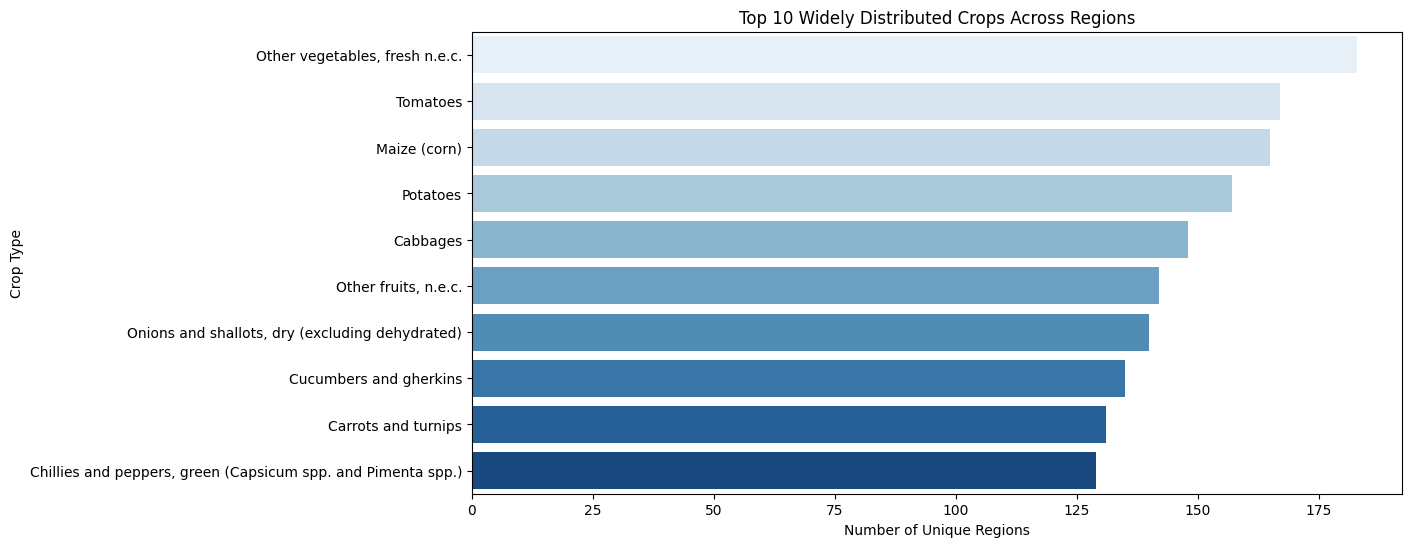

In [6]:

crop_region_counts = df.groupby("Item")["Area"].nunique().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(y=crop_region_counts.index[:10], x=crop_region_counts.values[:10], palette="Blues")
plt.title("Top 10 Widely Distributed Crops Across Regions")
plt.xlabel("Number of Unique Regions")
plt.ylabel("Crop Type")
plt.show()

Top 10 Regions with the Highest Agricultural Activity

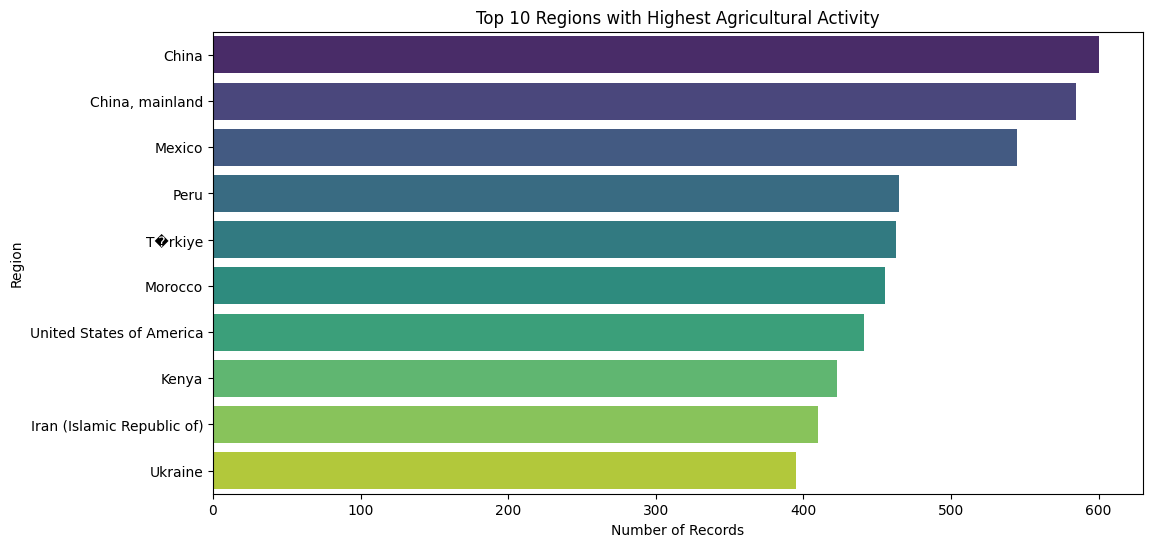

In [ ]:

region_counts = df["Area"].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(y=region_counts.index[:10], 
            x=region_counts.values[:10], 
            hue=region_counts.index[:10],  # Fix warning
            palette="viridis", 
            legend=False)
plt.title("Top 10 Regions with Highest Agricultural Activity")
plt.xlabel("Number of Records")
plt.ylabel("Region")
plt.show()

Yearly Trends in Area Harvested, Yield, and Production

<Figure size 1200x600 with 0 Axes>

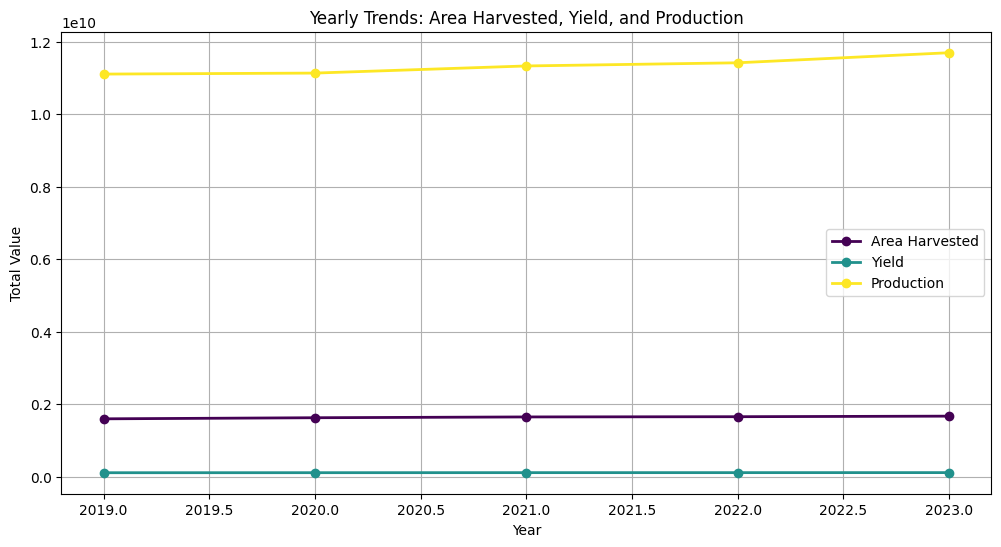

In [8]:

df["Year"] = df["Year"].astype(int)
yearly_trends = df.groupby("Year")[["Area harvested", "Yield", "Production"]].sum()
plt.figure(figsize=(12, 6))
yearly_trends.plot(marker="o", colormap="viridis", linewidth=2, figsize=(12, 6))
plt.title("Yearly Trends: Area Harvested, Yield, and Production")
plt.xlabel("Year")
plt.ylabel("Total Value")
plt.grid(True)
plt.legend(["Area Harvested", "Yield", "Production"])
plt.show()


Growth Analysis of Specific Crops

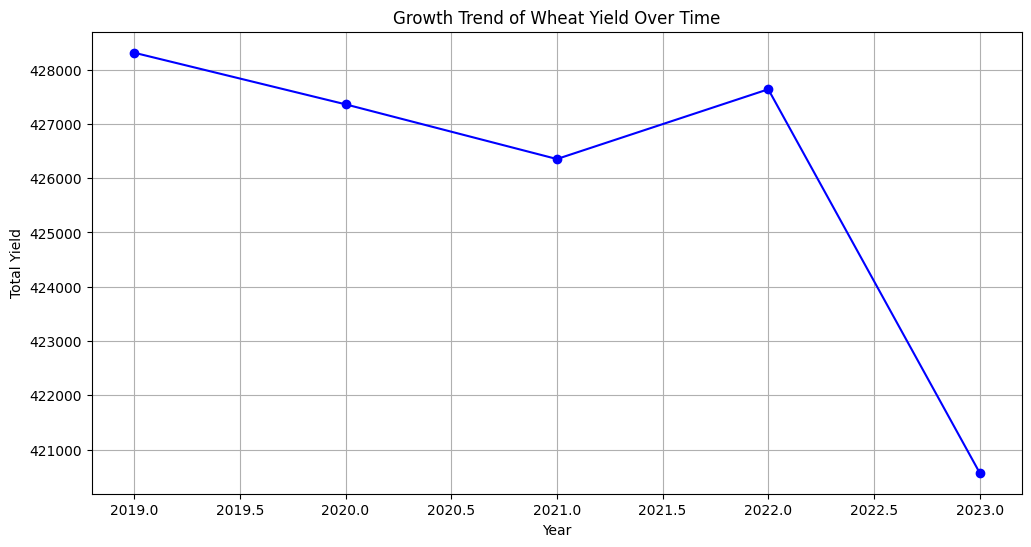

In [ ]:

crop_name = "Wheat"
crop_trend = df[df["Item"] == crop_name].groupby("Year")["Yield"].sum()
plt.figure(figsize=(12, 6))
plt.plot(crop_trend.index, crop_trend.values, marker="o", linestyle="-", color="blue")
plt.title(f"Growth Trend of {crop_name} Yield Over Time")
plt.xlabel("Year")
plt.ylabel("Total Yield")
plt.grid(True)
plt.show()


Correlation Analysis: Area Harvested vs. Yield

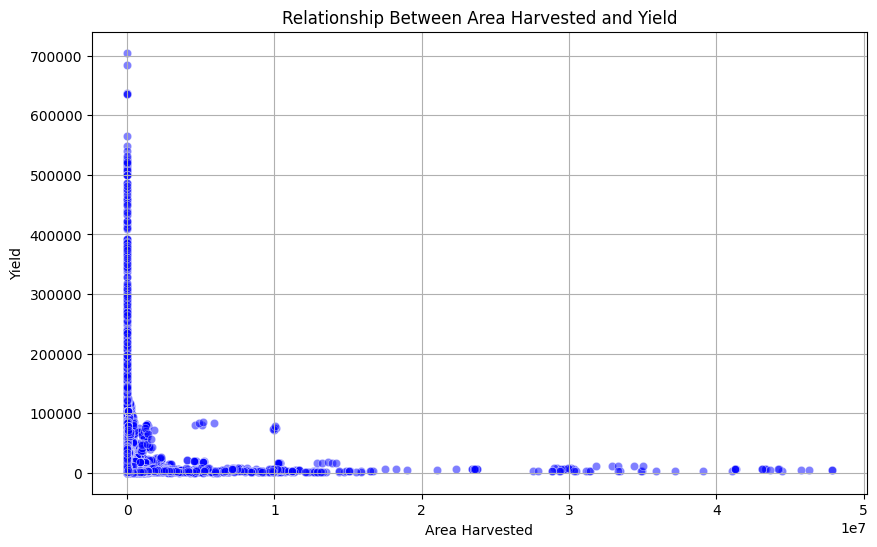

Correlation between Area Harvested and Yield: -0.03


In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Area harvested", y="Yield", alpha=0.5, color="blue")
plt.title("Relationship Between Area Harvested and Yield")
plt.xlabel("Area Harvested")
plt.ylabel("Yield")
plt.grid(True)
plt.show()

# Compute correlation
correlation = df["Area harvested"].corr(df["Yield"])
print(f"Correlation between Area Harvested and Yield: {correlation:.2f}")

Study correlations between Area harvested, Yield, and Production 

In [2]:
import pandas as pd
data = pd.read_csv('D:\Project_3\FAOSTAT_TRANSFORMED_CLEANED.csv')
correlation_matrix = data[['Area harvested', 'Yield', 'Production']].corr()
print(correlation_matrix)


                Area harvested     Yield  Production
Area harvested        1.000000 -0.026551    0.640862
Yield                -0.026551  1.000000    0.052955
Production            0.640862  0.052955    1.000000


<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Gowtham\AppData\Local\Temp\ipykernel_4116\3627471573.py:2: SyntaxWarning: invalid escape sequence '\P'
  data = pd.read_csv('D:\Project_3\FAOSTAT_TRANSFORMED_CLEANED.csv')


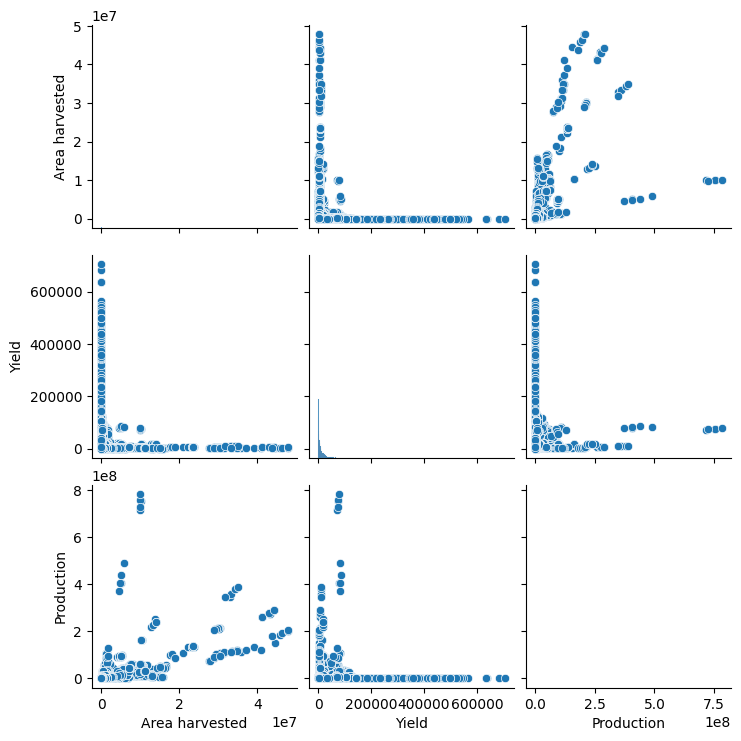

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data[['Area harvested', 'Yield', 'Production']])
plt.show()


Boxplot Analysis

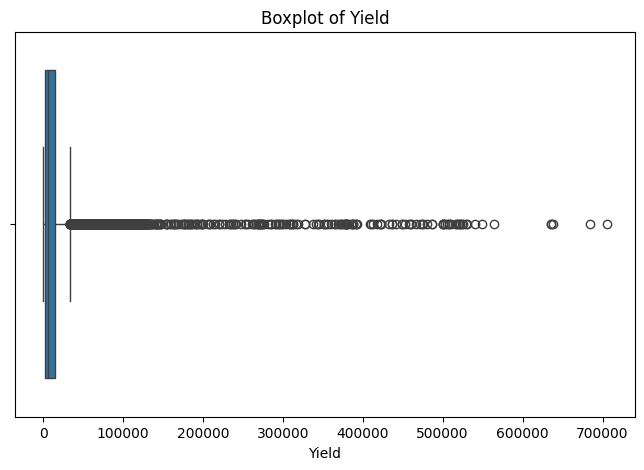

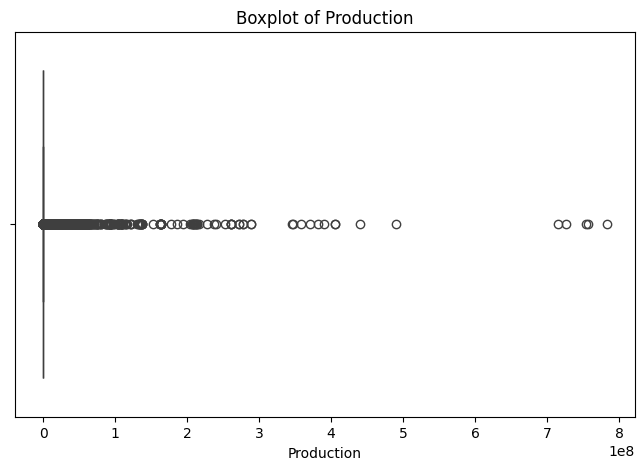

In [6]:


# Boxplot for Yield
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Yield'])
plt.title('Boxplot of Yield')
plt.show()

# Boxplot for Production
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Production'])
plt.title('Boxplot of Production')
plt.show()


Scatterplot for Detecting Anomalies

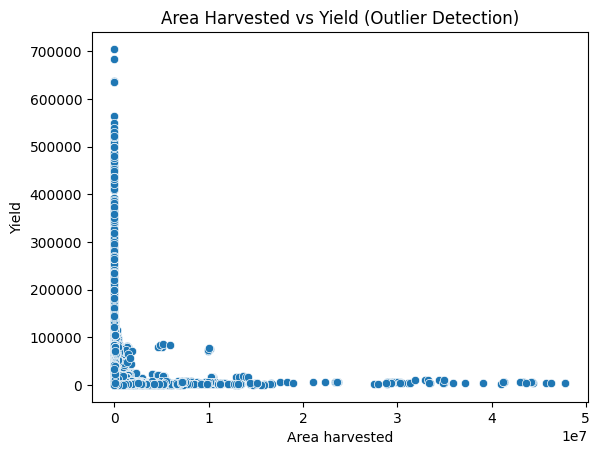

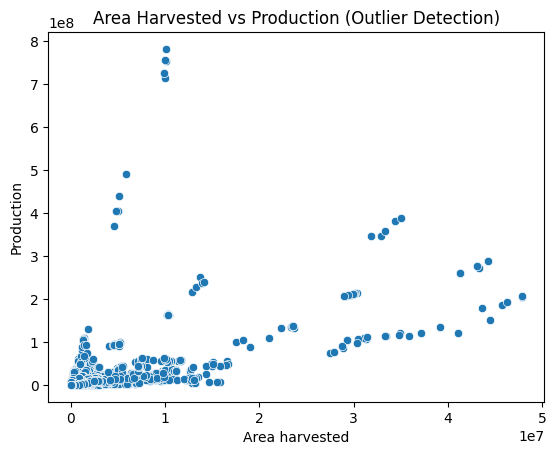

In [7]:
sns.scatterplot(x=data['Area harvested'], y=data['Yield'])
plt.title('Area Harvested vs Yield (Outlier Detection)')
plt.show()

sns.scatterplot(x=data['Area harvested'], y=data['Production'])
plt.title('Area Harvested vs Production (Outlier Detection)')
plt.show()


Using IQR (Interquartile Range) Method

In [8]:
import numpy as np

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers in Yield and Production
outliers_yield = detect_outliers_iqr(data, 'Yield')
outliers_production = detect_outliers_iqr(data, 'Production')

print(f"Outliers in Yield: {len(outliers_yield)}")
print(f"Outliers in Production: {len(outliers_production)}")


Outliers in Yield: 3307
Outliers in Production: 7231
